# Random Forest

As I mentioned in Decision_Tree, Decision_Tree model tends to be overfitted.

But using Random Forest, Ensemble method of Decision Tree, we can prevent model from being overfitted.

It can easily be proved that ensemble method can prevent model from being overfitted.


## How to build Random Forest?

To build Random Forest model, it use randomness when making tree.

First, number of tree have to be defined.(**n_estimaotors**)

These tree must be independent each other, Randomness is needed.

For building a tree **Bootstrap sample** is used.

And, when making **test(Question)**, each node randomly choose feature for test. we can define how many feature use.(**max_features**).



In other words, we use randomness for ensemble method two times
- Sampling
- Feature for test



## Random Forest Analyze

In [1]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state=42)

##### Use 5 tree.

In [3]:
fr = RandomForestClassifier(n_estimators=5, random_state=2)
fr.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

##### Visualization

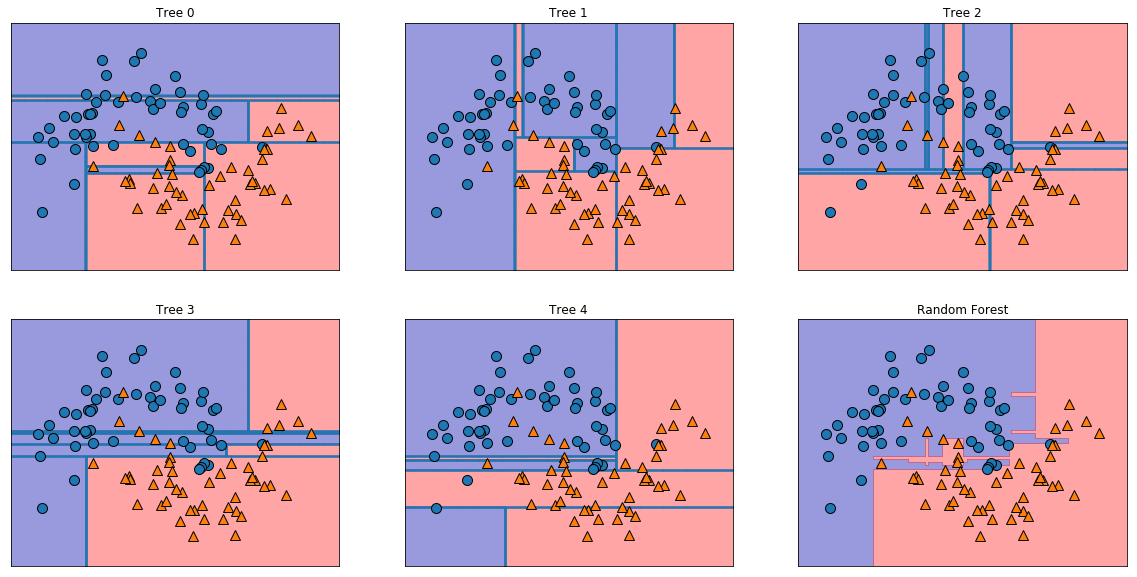

In [4]:
fit, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), fr.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(fr, X, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

Last Graph, describing decision boundary of **Random Forest**, means average of predict possibility of 5 trees.

We can find decision boundary of **Random Forest** is much better than each tree.

In real application, we use a lot of trees so we can get more tender decision boundary.

### Another Example (Breast Cancer)

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
fr = RandomForestClassifier(n_estimators=100, random_state=0)
fr.fit(X_train, y_train)

print("Train set accuracy: {:.3f}".format(fr.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(fr.score(X_test, y_test)))

Train set accuracy: 1.000
Test set accuracy: 0.972


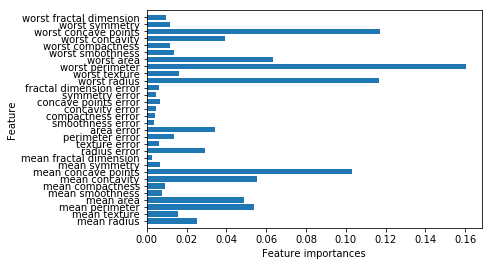

In [6]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importances")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(fr)

## Summary

Random Forest doesn't work well for high dimension dataset like text data and sparse data. (These data is proper for linear model.)

The number of n_estimators larger, the better. (But It takes more time and memory.)